In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('marketing_campaign_cleaned_final.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,In Relationship,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,In Relationship,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,In Relationship,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,In Relationship,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Total campaign acceptances
df["TotalCampaignAccepted"] = df[[
    "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"
]].sum(axis=1)

# Total spending
product_cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]
df["TotalSpending"] = df[product_cols].sum(axis=1)

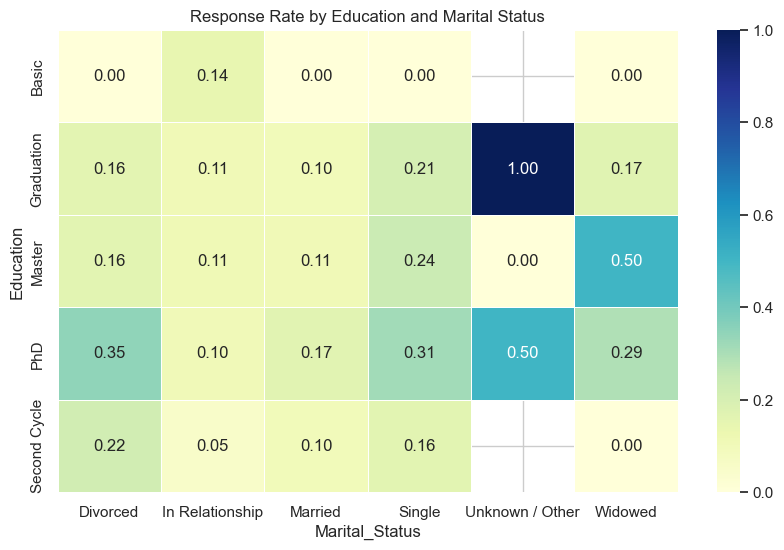

In [4]:
# ========== 1. Heatmap: Response rate by Education & Marital Status ==========
heatmap_data = df.groupby(["Education", "Marital_Status"])["Response"].mean().unstack()
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Response Rate by Education and Marital Status")
plt.show()

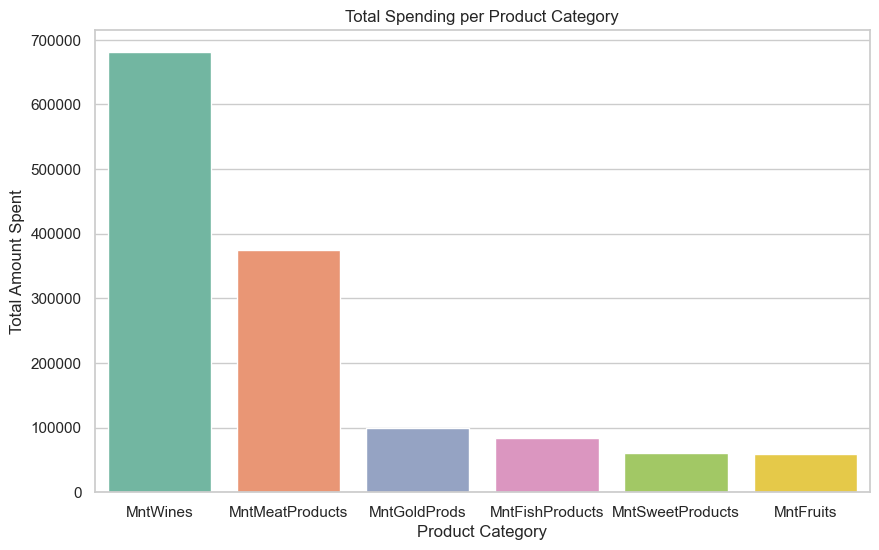

In [5]:
# ========== 2. Bar Chart: Product Category-Wise Total Spending ==========
total_spending = df[product_cols].sum().sort_values(ascending=False)
sns.barplot(x=total_spending.index, y=total_spending.values, palette="Set2")
plt.title("Total Spending per Product Category")
plt.ylabel("Total Amount Spent")
plt.xlabel("Product Category")
plt.show()

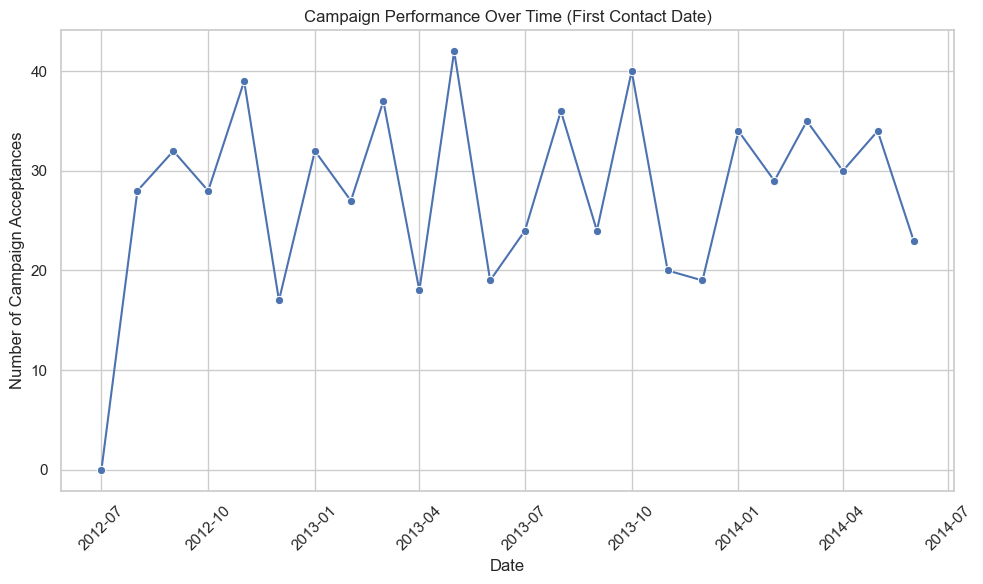

In [6]:

# ========== 3. Line Plot: Campaign Performance Over Time ==========
campaign_trend = (
    df.groupby(df["Dt_Customer"].dt.to_period("M"))["TotalCampaignAccepted"]
    .sum()
    .sort_index()
)
campaign_trend.index = campaign_trend.index.to_timestamp()
sns.lineplot(x=campaign_trend.index, y=campaign_trend.values, marker="o")
plt.title("Campaign Performance Over Time (First Contact Date)")
plt.ylabel("Number of Campaign Acceptances")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

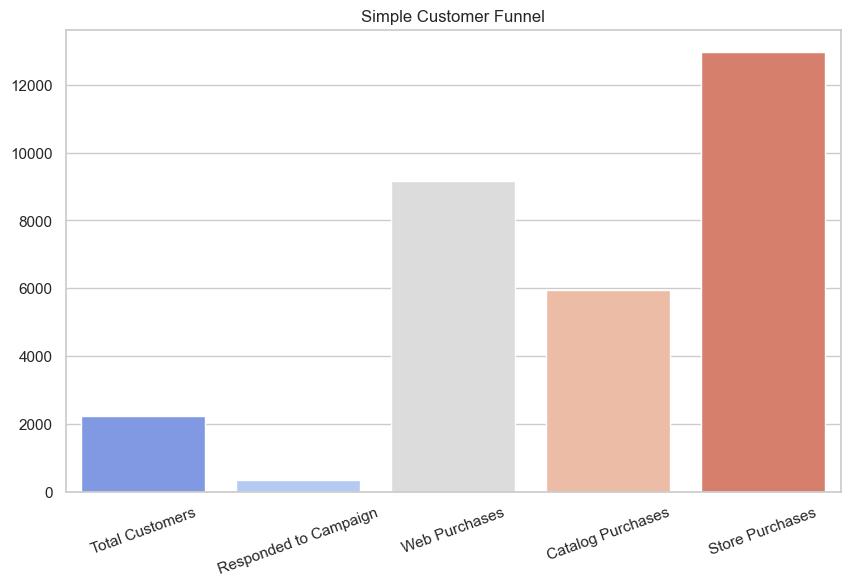

In [7]:

# ========== 4. Simple Customer Funnel ==========
total_customers = len(df)
responded = df["Response"].sum()
web_purch = df["NumWebPurchases"].sum()
store_purch = df["NumStorePurchases"].sum()
catalog_purch = df["NumCatalogPurchases"].sum()

funnel_data = {
    "Total Customers": total_customers,
    "Responded to Campaign": responded,
    "Web Purchases": web_purch,
    "Catalog Purchases": catalog_purch,
    "Store Purchases": store_purch,
}
sns.barplot(x=list(funnel_data.keys()), y=list(funnel_data.values()), palette="coolwarm")
plt.title("Simple Customer Funnel")
plt.xticks(rotation=20)
plt.show()

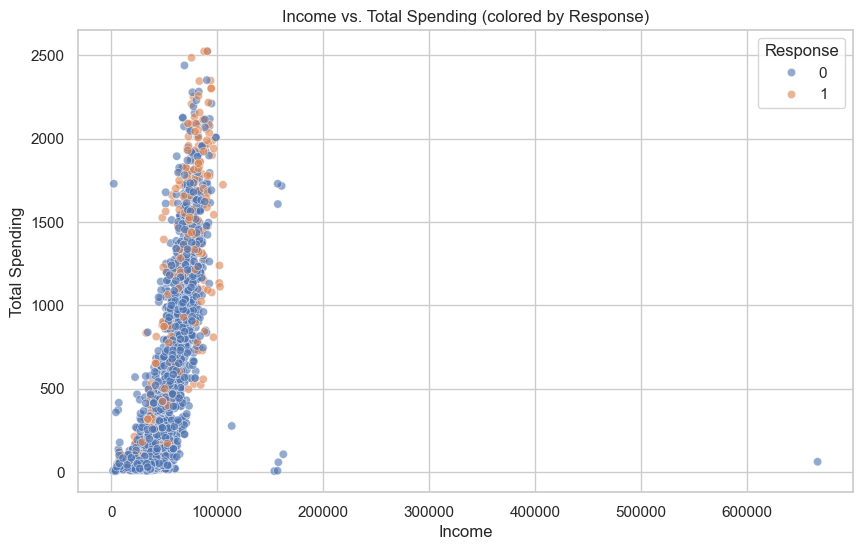

In [8]:
# ========== 5. Scatter Plot: Income vs Total Spending ==========
sns.scatterplot(data=df, x="Income", y="TotalSpending", hue="Response", alpha=0.6)
plt.title("Income vs. Total Spending (colored by Response)")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.show()

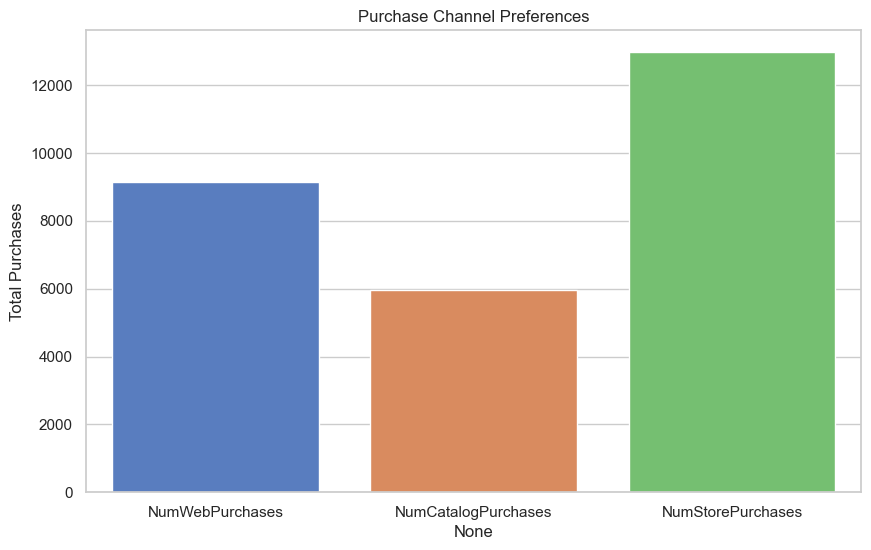

In [9]:

# ========== 6. Bar Chart: Purchase Channel Preferences ==========
channel_cols = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
channel_totals = df[channel_cols].sum()
sns.barplot(x=channel_totals.index, y=channel_totals.values, palette="muted")
plt.title("Purchase Channel Preferences")
plt.ylabel("Total Purchases")
plt.show()

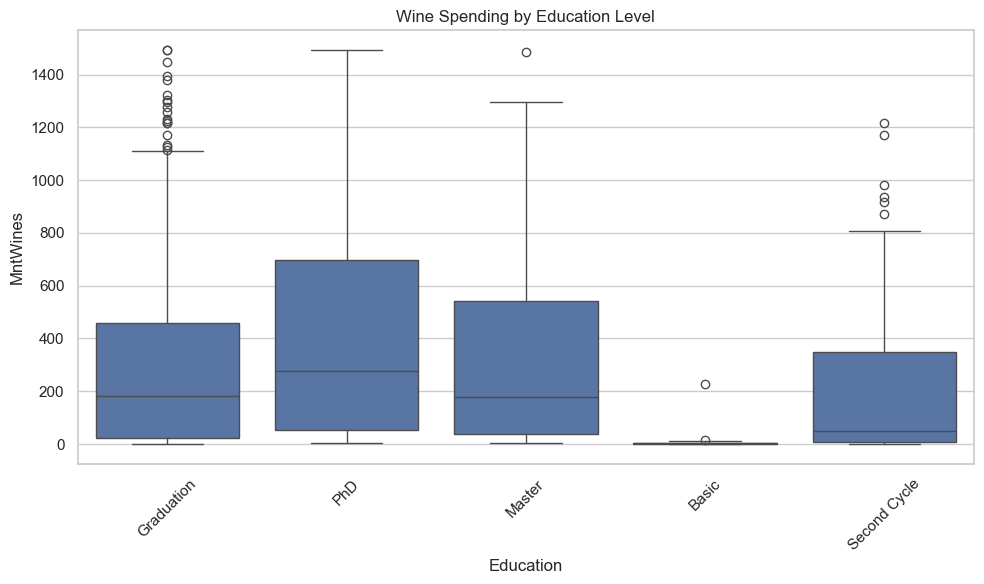

In [10]:
# ========== 7. Boxplot: Spending on Wines by Education ==========
sns.boxplot(x="Education", y="MntWines", data=df)
plt.title("Wine Spending by Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
alpha = 0.05

# ----- 1. Married vs Single: Total Spending -----
married = df[df["Marital_Status"] == "Married"]["TotalSpending"]
single = df[df["Marital_Status"] == "Single"]["TotalSpending"]

tstat1, pval1 = ttest_ind(married, single, equal_var=False)
print("1. Married vs Single - Spending")
print(f"T-statistic = {tstat1:.3f}, p-value = {pval1:.3f}")
if pval1 < alpha:
    print("Significant difference: We reject the null hypothesis.")
else:
    print("No significant difference: We fail to reject the null hypothesis.")

1. Married vs Single - Spending
T-statistic = -0.387, p-value = 0.699
No significant difference: We fail to reject the null hypothesis.


In [34]:
# ----- 2. Responded vs Not Responded: Total Spending -----
responded = df[df["Response"] == 1]["TotalSpending"]
not_responded = df[df["Response"] == 0]["TotalSpending"]

tstat2, pval2 = ttest_ind(responded, not_responded, equal_var=False)
print("2. Responded vs Not Responded - Spending")
print(f"T-statistic = {tstat2:.3f}, p-value = {pval2:.3f}")
if pval2 < alpha:
    print("Significant difference: We reject the null hypothesis.\n")
else:
    print("No significant difference: We fail to reject the null hypothesis.\n")

2. Responded vs Not Responded - Spending
T-statistic = 10.850, p-value = 0.000
Significant difference: We reject the null hypothesis.



In [36]:
# ----- 3. With vs Without Children: Income -----
df["HasChildren"] = df["Kidhome"] + df["Teenhome"] > 0
with_kids = df[df["HasChildren"] == True]["Income"]
without_kids = df[df["HasChildren"] == False]["Income"]

tstat3, pval3 = ttest_ind(with_kids, without_kids, equal_var=False)
print("3. With vs Without Children - Income")
print(f"T-statistic = {tstat3:.3f}, p-value = {pval3:.3f}")
if pval3 < alpha:
    print("Significant difference: We reject the null hypothesis.\n")
else:
    print("No significant difference: We fail to reject the null hypothesis.\n")

3. With vs Without Children - Income
T-statistic = -16.917, p-value = 0.000
Significant difference: We reject the null hypothesis.

